In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

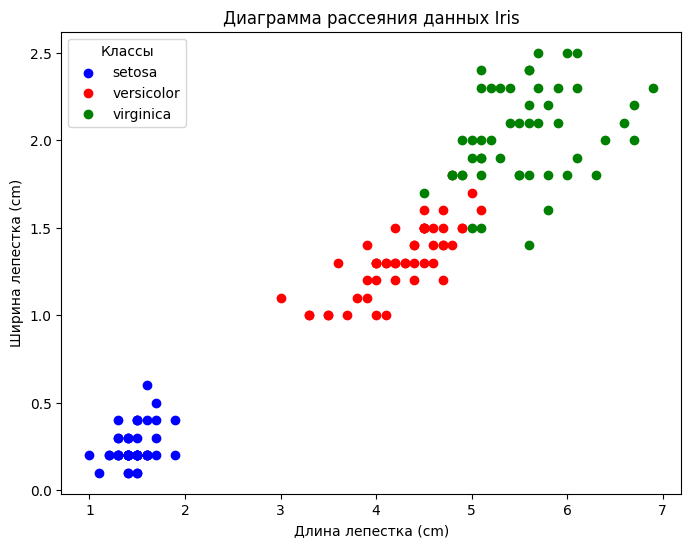

In [ ]:
# Загрузка набора данных Iris
iris = load_iris()
X = iris.data[:, 2:]  # Берем последние два столбца

# Создаем диаграмму рассеяния
plt.figure(figsize=(8, 6))

# Подкраска данных по классам
colors = ['blue', 'red', 'green']
for i in range(len(colors)):
    plt.scatter(X[iris.target == i, 0], X[iris.target == i, 1], c=colors[i], label=iris.target_names[i])

plt.xlabel('Длина лепестка (cm)')
plt.ylabel('Ширина лепестка (cm)')
plt.title('Диаграмма рассеяния данных Iris')
plt.legend(title='Классы', loc='upper left')
plt.show()

2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

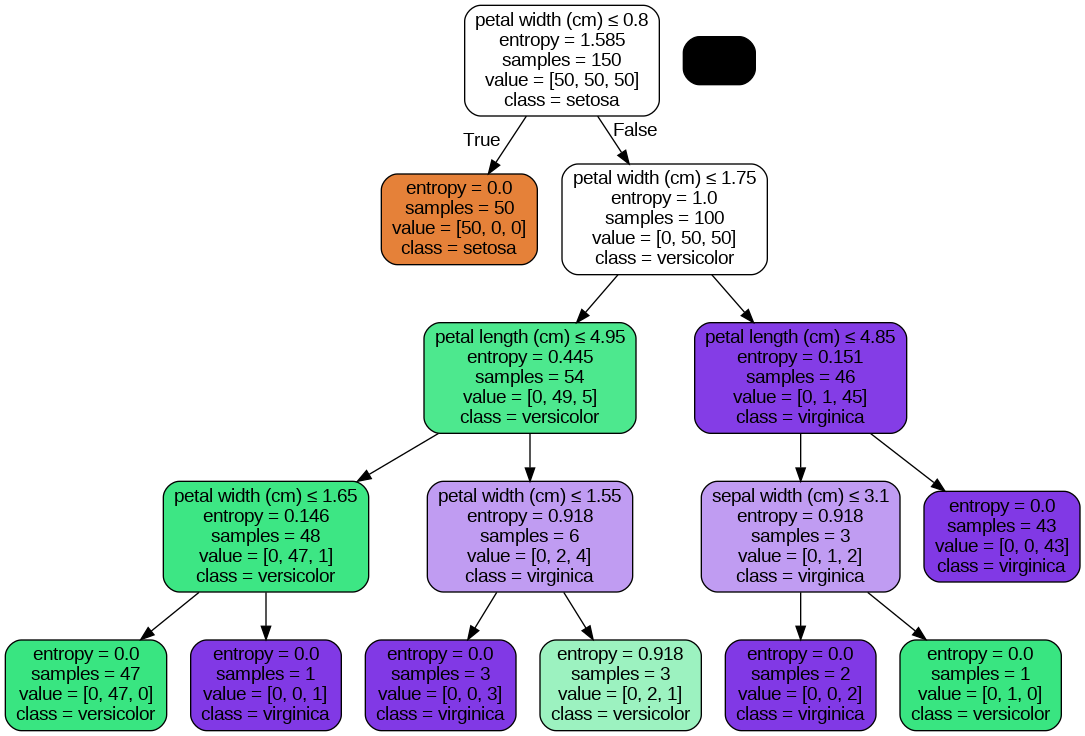

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf.fit(X, y)

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Метрики для модели с глубиной 1: Accuracy=0.6666666666666666, Precision=0.5253968253968254, Recall=0.6666666666666666, F1=0.567872807017544
Метрики для модели с глубиной 2: Accuracy=0.6666666666666666, Precision=0.49601275917065385, Recall=0.6666666666666666, F1=0.5619047619047619
Метрики для модели с глубиной 3: Accuracy=0.9, Precision=0.9013888888888889, Recall=0.9, F1=0.89923273657289
Метрики для модели с глубиной 4: Accuracy=0.9, Precision=0.9013888888888889, Recall=0.9, F1=0.89923273657289
Метрики для модели с глубиной 10: Accuracy=0.8666666666666667, Precision=0.8774410774410775, Recall=0.8666666666666667, F1=0.8666666666666667


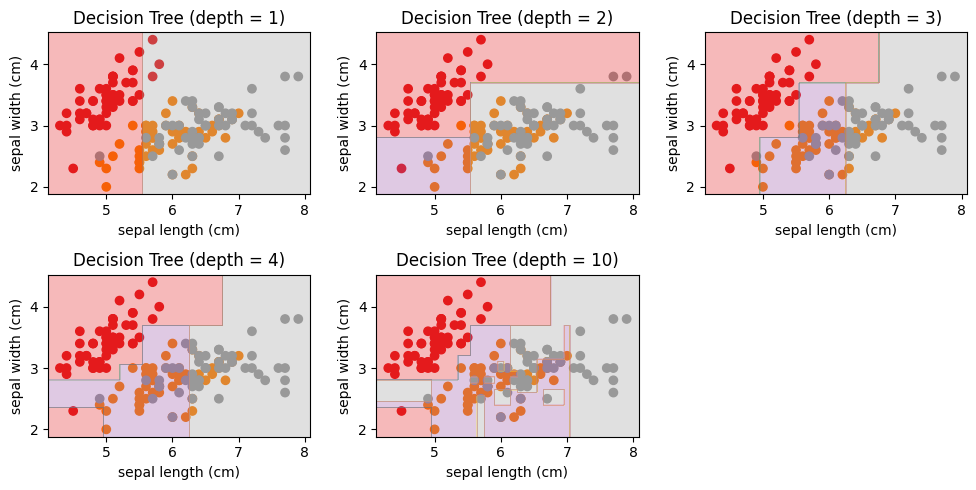

In [ ]:
X = iris.data[:, :2]  # Берем первые две фичи для наглядности
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Обучение моделей с разными глубинами
depths = [1, 2, 3, 4, 10]
plt.figure(figsize=(10, 5))

for i, depth in enumerate(depths):
    # Обучение модели
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    clf.fit(X, y)

    # Визуализация разделяющих областей
    plt.subplot(2, 3, i + 1)

    # График разделяющих областей
    plt.title(f'Decision Tree (depth = {depth})')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

    # Разделяющие области решающего дерева
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
    plt.axis("tight")
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Метрики для модели с глубиной {depth}: Accuracy={accuracy}, Precision={precision}, Recall={recall}, F1={f1}")

plt.tight_layout()
plt.show()

4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

In [ ]:
# Оценка работы модели
for i, depth in enumerate(depths):
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Метрики для модели с глубиной {depth}: Accuracy={accuracy}, Precision={precision}, Recall={recall}, F1={f1}")

Метрики для модели с глубиной 1: Accuracy=0.6666666666666666, Precision=0.5253968253968254, Recall=0.6666666666666666, F1=0.567872807017544
Метрики для модели с глубиной 2: Accuracy=0.6666666666666666, Precision=0.49601275917065385, Recall=0.6666666666666666, F1=0.5619047619047619
Метрики для модели с глубиной 3: Accuracy=0.9, Precision=0.9013888888888889, Recall=0.9, F1=0.89923273657289
Метрики для модели с глубиной 4: Accuracy=0.9, Precision=0.9013888888888889, Recall=0.9, F1=0.89923273657289
Метрики для модели с глубиной 10: Accuracy=0.8666666666666667, Precision=0.8774410774410775, Recall=0.8666666666666667, F1=0.8666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Вывод.***


Модели с глубиной 3 и 4 дают лучшие результаты по сравнению с
моделями с глубиной 1, 2 и 10. Модели с глубиной 3 и 4 имеют высокие показатели точности, полноты и F1-меры, а также высокую общую точность классификации. Поэтому, можно сказать, что модели с глубиной 3 и 4 лучше всего классифицируют данные из предоставленной выборки.

5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

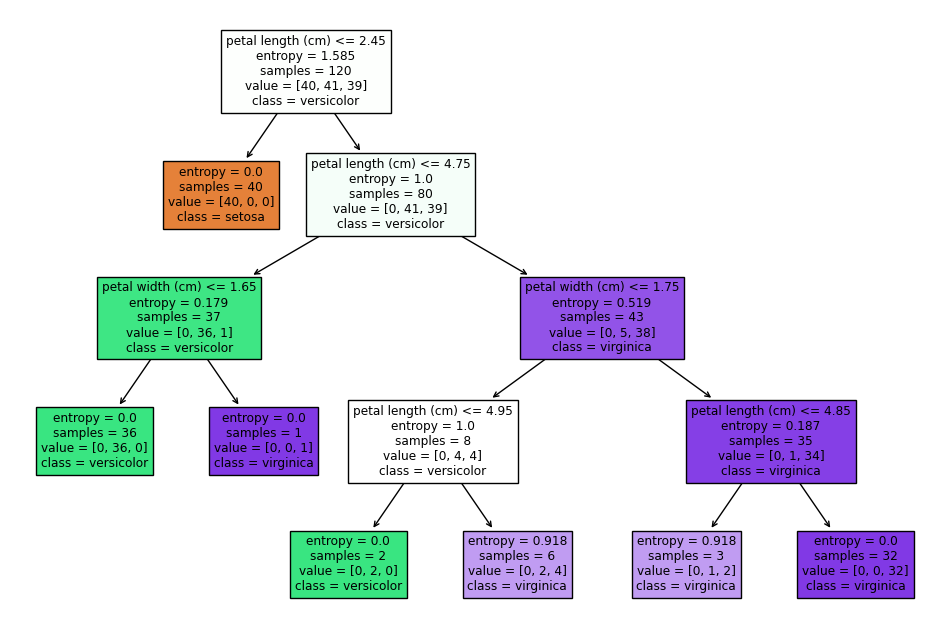

Accuracy: 1.0


In [ ]:
# Загрузка датасета
iris = load_iris()
X = iris.data
y = iris.target

# Разделение датасета на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели классификационного дерева принятия решений
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train, y_train)

# Визуализация графа дерева решений
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

# Оценка качества работы модели
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

6. Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

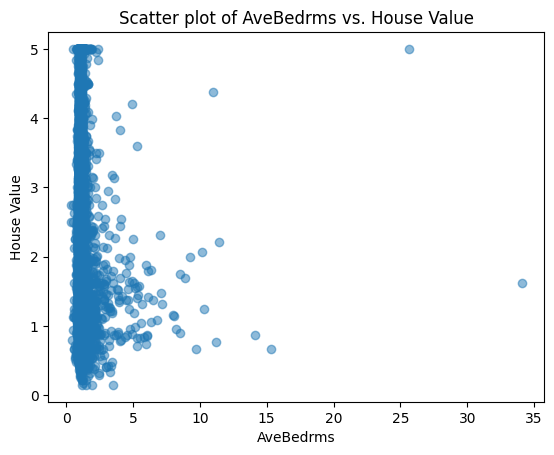

In [ ]:
# Загрузка данных
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

# Используем только столбец AveBedrms в качестве признака
AveBedrms_index = feature_names.index('AveBedrms')
X = X[:, AveBedrms_index]

# Изображение данных на диаграмме рассеяния
plt.scatter(X, y, alpha=0.5)
plt.title('Scatter plot of AveBedrms vs. House Value')
plt.xlabel('AveBedrms')
plt.ylabel('House Value')
plt.show()

7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [ ]:
# Создаем некоторые данные для обучения модели
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([3, 4, 5])

# Инициализируем и обучаем модель регрессионного дерева
model = DecisionTreeRegressor(random_state=0)
model.fit(X, y)

DecisionTreeRegressor(random_state=0)

8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

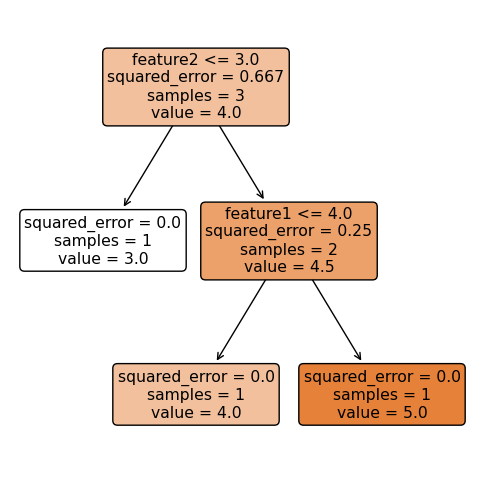

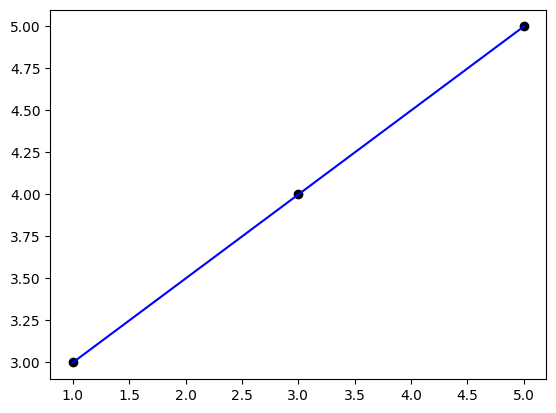

In [ ]:
import graphviz
# Визуализация графа дерева решений
plt.figure(figsize=(6, 6))
plot_tree(model,
          feature_names=['feature1', 'feature2'],
          filled=True, rounded=True)
plt.show()
print()
# Визуализация кусочной линии регрессии
plt.scatter(X[:, 0], y, color='black')
plt.plot(X[:, 0], model.predict(X), color='blue')
plt.show()

9. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [ ]:
# Создадим новое наблюдение и сделаем предсказание
new_observation = np.array([[5, 9]])
prediction = clf.predict(new_observation)
print(f"Предсказание для нового наблюдения {new_observation}:{iris.target_names[prediction]}")

Предсказание для нового наблюдения [[5 9]]:['setosa']


10. Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

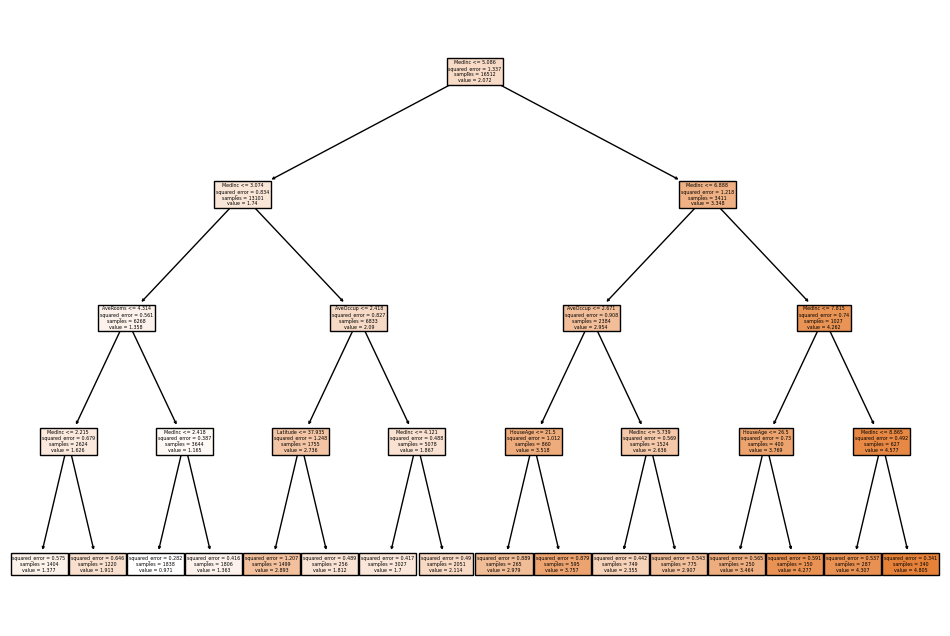

Точность на обучающем наборе: 0.5886585082002127
Точность на тестовом наборе: 0.5540288505085005


In [ ]:
# Загрузка набора данных fetch_california_housing
data = fetch_california_housing()

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Обучение модели дерева решений
model = DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)

# Визуализация графа дерева решений
plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled=True, feature_names=data.feature_names)
plt.show()

# Оценка качества работы модели
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Точность на обучающем наборе: {train_score}")
print(f"Точность на тестовом наборе: {test_score}")